In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

## Perform API Calls

In [10]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
cityInfo = {"City": ['Latitude', 'Temperature(F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']}
# Starting URL for Weather Map API Call
count = 0
for city in cities:
    count += 1
    url = "http://api.openweathermap.org/data/2.5/weather?&appid=" + api_key + "&q=" + city + "&units=imperial"
    response = requests.get(url).json()
    try:
        cityInfo.update({response["name"]: [response["coord"]["lat"], response["main"]["temp"], response["main"]["humidity"], response["clouds"]["all"], response["wind"]["speed"]]})
        print("{0}. {1} {2}".format(count, response["name"], response["id"]))
    except:
        print("{0}. {1} does not have any data.".format(count, city))
    time.sleep(1)    

1. Ushuaia 3833367
2. Busselton 2075265
3. Vizinga 473263
4. Albany 5106834
5. Curillo 3733861
6. Esperance 3573739
7. Saint-Augustin 3031582
8. Saskylakh 2017155
9. jaque does not have any data.
10. Port Alfred 964432
11. Airai 1651810
12. Carnarvon 1014034
13. Oranjestad 3577154
14. Bambous Virieux 1106677
15. Mahebourg 934322
16. illoqqortoormiut does not have any data.
17. Sicamous 6147353
18. Matola 1039854
19. Hobart 2163355
20. Kodiak 4407665
21. Luderitz 3355672
22. Shelburne 6145890
23. Villavicencio 3665900
24. Narsaq 3421719
25. Mataura 6201424
26. Xianyang 1790353
27. Codrington 2160063
28. Butaritari 2110227
29. scottsburgh does not have any data.
30. Porto Novo 6322184
31. Iqaluit 5983720
32. Bandarbeyla 64814
33. Rikitea 4030556
34. bengkulu does not have any data.
35. Taoudenni 2450173
36. Port Blair 1259385
37. Escarcega 3527795
38. taolanaro does not have any data.
39. amderma does not have any data.
40. Qaanaaq 3831208
41. Chuy 3443061
42. Hithadhoo 1282256
43. baren

347. Trinidad 3439749
348. Beira 3119841
349. Suksun 486413
350. Faqirwali 1179377
351. uzumlu does not have any data.
352. Sioux Lookout 6148373
353. Zakupne 687841
354. Espanola 5949493
355. Cap Malheureux 934649
356. Kisangani 212730
357. Lorengau 2092164
358. Naze 2337542
359. Ahuimanu 5856516
360. Banda Aceh 1215502
361. Diapaga 2361373
362. Sao Geraldo do Araguaia 3388760
363. Lasa 146639
364. Mutoko 884927
365. Taltal 3870243
366. Sampit 1628884
367. bolungarvik does not have any data.
368. Karratha 6620339
369. Sharlyk 495670
370. rungata does not have any data.
371. louisbourg does not have any data.
372. Tasiilaq 3424607
373. Coahuayana 3981460
374. Port-Cartier 6111696
375. Hovd 7626384
376. Broome 2656067
377. Tyup 1527121
378. Kralendijk 3513563
379. Plettenberg Bay 964712
380. Panguna 2088659
381. Vestmannaeyjar 3412093
382. San Martin 5392408
383. Sao Bernardo 3388949
384. Mon 1262824
385. At-Bashi 1528796
386. Whitianga 2179103
387. Hervey Bay 2146219
388. Amazar 202780

In [11]:
with open("cityData.csv", "w", newline="") as csvFile:
    csvWriter = csv.writer(csvFile)
    for key, value in cityInfo.items():
        csvWriter.writerow([key, value])

In [37]:
cityInfo.pop("City")
cityDF = pd.DataFrame.from_dict(cityInfo, orient="index")#(cityInfo.items(),index=cityInfo.keys(), columns=["City", "Latitude", "Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"])
cityDF.rename(columns={0:"Lat",1: "Temp",2: "Humidity",3: "Cloudiness",4: "Wind Speed"}, inplace=True)

             Lat   Temp  Humidity  Cloudiness  Wind Speed
Ushuaia   -54.81  32.00       100          90        8.05
Busselton -33.64  60.31       100          92       16.49
Vizinga    61.08  62.91        67          36       10.67
Albany     42.65  68.43        93           1        3.18
Curillo     1.03  65.89        95          80        2.17


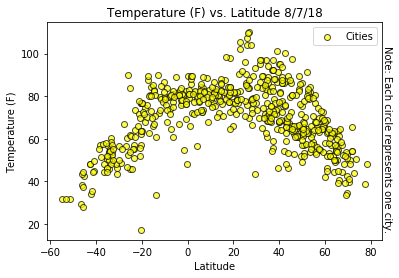

In [111]:
plt.scatter(cityDF["Lat"], cityDF["Temp"], c="yellow", alpha=.7, edgecolors="black", label="Cities")
plt.title("Temperature (F) vs. Latitude 8/7/18")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.legend()
plt.text(85,100,"Note: Each circle represents one city.", rotation=270)
plt.savefig("tempVsLat.png")
plt.show()

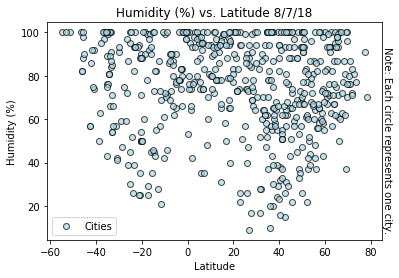

In [112]:
plt.scatter(cityDF["Lat"], cityDF["Humidity"], c="lightblue", alpha=.7, edgecolors="black", label="Cities")
plt.title("Humidity (%) vs. Latitude 8/7/18")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.text(85,90,"Note: Each circle represents one city.", rotation=270)
plt.savefig("humidityVsLat.png")
plt.show()

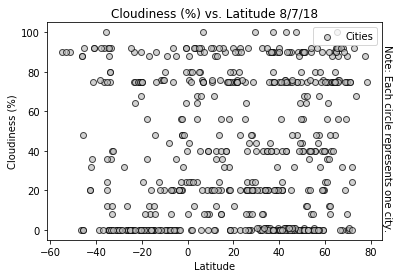

In [114]:
plt.scatter(cityDF["Lat"], cityDF["Cloudiness"], c="silver", alpha=.7, edgecolors="black", label="Cities")
plt.title("Cloudiness (%) vs. Latitude 8/7/18")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.text(85,90,"Note: Each circle represents one city.", rotation=270)
plt.savefig("cloudinessVsLat.png")
plt.show()

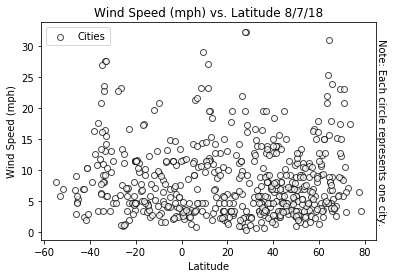

In [115]:
plt.scatter(cityDF["Lat"], cityDF["Wind Speed"], c="white", alpha=.7, edgecolors="black", label="Cities")
plt.title("Wind Speed (mph) vs. Latitude 8/7/18")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.legend()
plt.text(85,30,"Note: Each circle represents one city.", rotation=270)
plt.savefig("windSpeedVsLat.png")
plt.show()